In [1]:
import numpy as np 
import pandas as pd
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import seaborn as sn
import datetime as datetime
import yfinance as yf

In [2]:
# downloading stock data and filter closing price to use for calculating returns, storing prices in stocks_10y_price

# scroll down for visualisation of stock_historical_data

stocks = ['AAPL','TSLA','NVDA','BYDDY','AMD','MSFT','AMZN','TSM','META','GOOG']
stocks_10y_price = pd.DataFrame()
yf.pdr_override()
for stock in stocks:
    stock_historical_data = pdr.get_data_yahoo(stock, start='2014-01-01', end='2024-01-06')
    stock_historical_closing_price = stock_historical_data[['Close']].rename(columns={'Close':stock})
    stocks_10y_price = pd.concat([stocks_10y_price,stock_historical_closing_price],axis=1)
stocks_10y_price

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,AAPL,TSLA,NVDA,BYDDY,AMD,MSFT,AMZN,TSM,META,GOOG
Date,,,,,,,,,,
2014-01-02,19.754642,10.006667,3.965000,9.470000,3.950000,37.160000,19.898500,17.150000,54.709999,27.724083
2014-01-03,19.320715,9.970667,3.917500,9.570000,4.000000,36.910000,19.822001,16.950001,54.560001,27.521841
2014-01-06,19.426071,9.800000,3.970000,9.600000,4.130000,36.130001,19.681499,16.900000,57.200001,27.828691
2014-01-07,19.287144,9.957333,4.035000,9.580000,4.180000,36.410000,19.901501,16.910000,57.919998,28.365179
2014-01-08,19.409286,10.085333,4.090000,9.740000,4.180000,35.759998,20.096001,17.090000,58.230000,28.424210
...,...,...,...,...,...,...,...,...,...,...
2023-12-29,192.529999,248.479996,495.220001,55.270000,147.410004,376.040009,151.940002,104.000000,353.959991,140.929993
2024-01-02,185.639999,248.419998,481.679993,53.700001,138.580002,370.869995,149.929993,101.529999,346.290009,139.559998
2024-01-03,184.250000,238.449997,475.690002,54.459999,135.320007,370.600006,148.470001,100.169998,344.470001,140.360001


In [3]:
# raw GOOG stock data downloaded from the internet which is used to obtain the stocks_10y_price above

stock_historical_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,27.782366,27.839401,27.603037,27.724083,27.724083,73129082
2014-01-03,27.770908,27.818977,27.520098,27.521841,27.521841,66917888
2014-01-06,27.721344,27.867046,27.557707,27.828691,27.828691,71037271
2014-01-07,28.019974,28.385853,27.924334,28.365179,28.365179,102486711
2014-01-08,28.543015,28.575891,28.226450,28.424210,28.424210,90036218
...,...,...,...,...,...,...
2023-12-29,140.679993,141.434998,139.899994,140.929993,140.929993,14872700
2024-01-02,139.600006,140.615005,137.740005,139.559998,139.559998,20071900
2024-01-03,138.600006,141.089996,138.429993,140.360001,140.360001,18974300


<Axes: title={'center': 'GOOG daily closing price'}, xlabel='Date', ylabel='USD'>

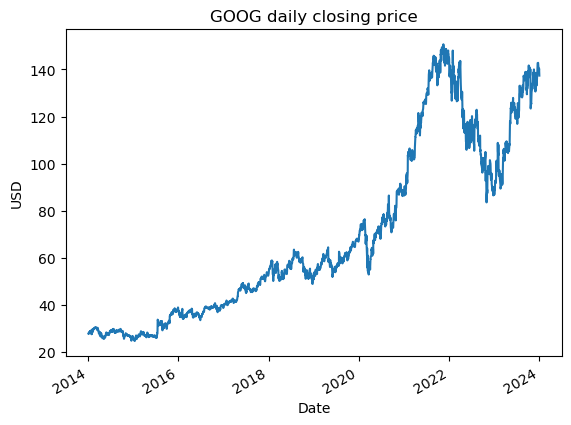

In [4]:
stocks_10y_price['GOOG'].plot(title='GOOG daily closing price',ylabel='USD')

In [5]:
# ensure user input a return frequency of 2, 3 or 5 days

accepted_frequencies = [2,3,5]
while True:
    return_frequency = input('Enter a return frequency in days: ')
    try:
        return_frequency = int(return_frequency)
    except ValueError:
        print('Error! Please input an integer that is 2,3 or 5.')
    else:
        if return_frequency not in accepted_frequencies:
            print('Error! Please input an integer that is 2,3 or 5.')
        else:
            break

Enter a return frequency in days: 5


In [6]:
# calculating returns in percentages based on the return frequency chosen by user and storing in compiled_returns

# compiled_returns_cleaned is then obtained by cleaning up the last few days for which the returns cannot be 
# calculated yet due to it requiring future data

# scroll down for visualisation of stock_data

compiled_returns = pd.DataFrame()
for stock in stocks_10y_price.columns:
    stock_data = stocks_10y_price[stock].reset_index()
    stock_data['return'] = ''
    for index in stock_data.index[:-return_frequency]:
        buy_price = stock_data.loc[index,stock]
        sell_price = stock_data.loc[index+return_frequency,stock]
        stock_return = 100*(sell_price-buy_price)/buy_price
        stock_data.loc[index,'return'] = stock_return
    stock_returns = stock_data[['Date','return']].set_index('Date').rename(columns={'return':stock})
    compiled_returns = pd.concat([compiled_returns,stock_returns],axis=1)
compiled_returns_cleaned = compiled_returns.iloc[:-return_frequency]
compiled_returns_cleaned

,AAPL,TSLA,NVDA,BYDDY,AMD,MSFT,AMZN,TSM,META,GOOG
Date,,,,,,,,,,
2014-01-02,-3.002909,-1.712201,-0.693567,1.900732,3.544306,-4.38644,0.763879,-2.274049,4.587831,1.538017
2014-01-03,-1.486196,-2.567527,0.382894,0.94044,4.250002,-2.357082,0.307733,-0.294992,6.195009,2.278734
2014-01-06,-1.507542,-5.210886,-3.274562,-1.14584,0.0,-3.182955,-0.67322,0.059173,-2.255246,0.506571
2014-01-07,1.175838,7.974029,-1.858731,-1.043845,2.870822,-1.730297,-0.123106,2.779416,-0.310767,0.925487
2014-01-08,2.557681,8.494192,-2.139367,-0.718683,6.937798,2.796421,-1.505273,2.750142,-1.081918,0.647544
...,...,...,...,...,...,...,...,...,...,...
2023-12-21,-1.104373,-2.365424,1.085937,5.881225,5.360589,0.669272,-1.235045,1.413941,-0.036715,-0.613548
2023-12-22,-4.111574,-1.631423,-1.355723,1.878205,-0.730662,-0.99044,-2.274805,-1.570531,-2.009113,-2.214128
2023-12-26,-4.558406,-7.076883,-3.470039,2.023226,-5.641166,-1.083649,-3.220131,-4.097653,-2.919704,-1.722452


In [7]:
# dataframe to store the time series of returns before compiling into compiled_returns

stock_data

,Date,GOOG,return
0,2014-01-02,27.724083,1.538017
1,2014-01-03,27.521841,2.278734
2,2014-01-06,27.828691,0.506571
3,2014-01-07,28.365179,0.925487
4,2014-01-08,28.424210,0.647544
...,...,...,...
2515,2023-12-29,140.929993,
2516,2024-01-02,139.559998,
2517,2024-01-03,140.360001,
2518,2024-01-04,138.039993,


In [8]:
compiled_returns_cleaned.to_csv('/Users/xianqun/Documents/GitHub/Assignment/returns.csv')

In [9]:
# ensure user input a lookback_period of 1,2 or 3 years

accepted_lookback_period = [1,2,3]
while True:
    lookback_period = input('Enter a lookback period in years: ')
    try:
        lookback_period = int(lookback_period)
    except ValueError:
        print('Error! Please input an integer that is 1,2 or 3.')
    else:
        if lookback_period not in accepted_lookback_period:
            print('Error! Please input an integer that is 1,2 or 3.')
        else:
            break

Enter a lookback period in years: 3


In [10]:
# calculating annualized ex-ante volatility of equally weighted portfolio

# we loop over the below ranges as the dataset starts in 2014 so there will not be enough 
# historical data to calculate covariance for the first lookback_period number of years

# scroll down for visualisation of compiled_returns_filtered and cov_matrix

portfolio_volatility = pd.DataFrame()
for year in range(2014+lookback_period,2024):
    for month in range(1,13):
        
        # each (year,month) in the for loop corresponds to a historical month-end point
        
        # for this particular month-end point, the period starting from lookback_start_date and 
        # ending right before lookback_end_date is the lookback period used to calculate covariance
        
        if month != 12:
            lookback_end_date = datetime.datetime(year,month+1,1)
            lookback_start_date = lookback_end_date-pd.DateOffset(years=lookback_period)
        else:
            lookback_end_date = datetime.datetime(year+1,1,1)
            lookback_start_date = lookback_end_date-pd.DateOffset(years=lookback_period)
        compiled_returns_filtered = compiled_returns_cleaned[(compiled_returns_cleaned.index>=lookback_start_date) & 
                                                             (compiled_returns_cleaned.index<lookback_end_date)]
        returns_matrix = compiled_returns_filtered.to_numpy().transpose()
        
        # computing covariance matrix using returns of stocks in lookback period
        ## EDIT: divided covariance matrix by 100 to work in decimals instead of percentages
        
        cov_matrix = np.cov(returns_matrix.astype(float),bias=False)/100
        
        # using portfolio volatility formula for periodic volatility
        
        volatility = (cov_matrix.sum()/100)**0.5
        
        # count how many trading days in the lookback period
        
        trading_days = compiled_returns_filtered.shape[0]
        annual_periods = trading_days/lookback_period/return_frequency
        annualized_volatility = volatility * annual_periods**0.5
        month_end_point = str(year) + '-' + f'{month:02}'
        annualized_volatility_df = pd.DataFrame(index=[month_end_point],data=[annualized_volatility],
                                               columns=['annualized volatility'])
        portfolio_volatility = pd.concat([portfolio_volatility,annualized_volatility_df])

In [11]:
# returns(%) in lookback period that is used to calculate covariance for month-end point Dec 2023

compiled_returns_filtered

,AAPL,TSLA,NVDA,BYDDY,AMD,MSFT,AMZN,TSM,META,GOOG
Date,,,,,,,,,,
2021-01-04,-0.332283,11.15694,3.873872,14.884133,5.362943,-0.091872,-2.272622,9.758283,-4.499147,2.226538
2021-01-05,-1.686888,15.552775,0.596806,13.72745,2.791855,-1.363011,-3.034946,9.071565,-7.336607,0.323394
2021-01-06,3.388626,13.020191,7.271401,14.802063,1.605222,1.926971,0.876559,3.131219,-4.432038,1.101254
2021-01-07,-1.535285,3.548841,-1.077263,3.081639,-4.592268,-2.414215,-1.097033,4.134066,-8.595666,-2.633655
2021-01-08,-3.718291,-6.120317,-3.142712,-4.48094,-6.735042,-3.173664,-2.464889,5.510153,-6.05823,-3.929809
...,...,...,...,...,...,...,...,...,...,...
2023-12-21,-1.104373,-2.365424,1.085937,5.881225,5.360589,0.669272,-1.235045,1.413941,-0.036715,-0.613548
2023-12-22,-4.111574,-1.631423,-1.355723,1.878205,-0.730662,-0.99044,-2.274805,-1.570531,-2.009113,-2.214128
2023-12-26,-4.558406,-7.076883,-3.470039,2.023226,-5.641166,-1.083649,-3.220131,-4.097653,-2.919704,-1.722452


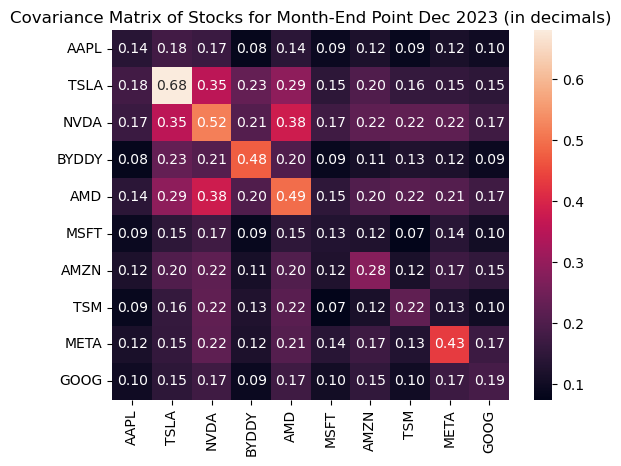

In [12]:
# plot covariance matrix when month-end point is Dec 2023

ax = plt.axes()
sn.heatmap(cov_matrix,annot=True,fmt='.2f',
           xticklabels=['AAPL','TSLA','NVDA','BYDDY','AMD','MSFT','AMZN','TSM','META','GOOG'],
           yticklabels=['AAPL','TSLA','NVDA','BYDDY','AMD','MSFT','AMZN','TSM','META','GOOG'],
           ax=ax)
ax.set_title('Covariance Matrix of Stocks for Month-End Point Dec 2023 (in decimals)')
plt.show()

In [13]:
portfolio_volatility.to_csv('/Users/xianqun/Documents/GitHub/Assignment/portfolio_volatility.csv')